In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import brier_score_loss
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing and Preparing the data 

In [ ]:
df_events=pd.read_csv("/content/drive/MyDrive/MData/features.csv")
df_events.drop(['game_id','action_id'],axis='columns', inplace=True) #Absolutely useless columns
df_results =pd.read_csv("/content/drive/MyDrive/MData/labels.csv") 

In [ ]:
print(df_results['goal'].value_counts())#Hence this is an unbalanced dataset
print("Initially there is a class imbalance with goal- 11.1% and no goal- 88.9%")
df_results['goal'] = df_results['goal'].astype(int)
y=df_results['goal']

False    38250
True      4790
Name: goal, dtype: int64
Initially there is a class imbalance with goal- 11.1% and no goal- 88.9%


***One Hot Encoding / Making dummies for categorical variables***

In [ ]:
df_events1s = df_events[['type_id_a0','bodypart_id_a0','start_x_a0', 'start_y_a0',\
                         'start_dist_to_goal_a0', 'start_angle_to_goal_a0',\
                         'shot_angle_a0','caley_zone_a0','angle_zone_a0']].copy()
df_events2s = df_events[['type_id_a0', 'type_id_a1','bodypart_id_a0','bodypart_id_a1','result_id_a1',\
                         'start_x_a0', 'start_y_a0', 'start_x_a1', 'start_y_a1','end_x_a1', 'end_y_a1',\
                         'dx_a1','dy_a1', 'movement_a1', 'dx_a01','dy_a01', 'mov_a01',\
                         'start_dist_to_goal_a0', 'start_angle_to_goal_a0',\
                         'start_dist_to_goal_a1', 'start_angle_to_goal_a1',\
                         'end_dist_to_goal_a1', 'end_angle_to_goal_a1',\
                         'team_1',  'time_delta_1',\
                         'speedx_a01', 'speedy_a01', 'speed_a01',  'shot_angle_a0', 'shot_angle_a1',\
                         'caley_zone_a0', 'caley_zone_a1','angle_zone_a0', 'angle_zone_a1']].copy()
df_events3s = df_events.copy()
df_basic = df_events1s[['type_id_a0','bodypart_id_a0','start_x_a0', 'start_y_a0',\
                         'start_dist_to_goal_a0','shot_angle_a0']].copy()

In [ ]:
def create_dummies(data,nshots=0):
    if (nshots>=0):
        data_dummies = pd.get_dummies(data.type_id_a0,prefix="type_id_a0")
        data = data.join(data_dummies)
        data=data.drop(columns=["type_id_a0"])
        data_dummies = pd.get_dummies(data.bodypart_id_a0,prefix="bodypart_id_a0")  
        data = data.join(data_dummies)
        data=data.drop(columns=["bodypart_id_a0"]) 
    if (nshots>=1):
        data_dummies = pd.get_dummies(data.caley_zone_a0,prefix="caley_zone_a0") 
        data = data.join(data_dummies)
        data=data.drop(columns=["caley_zone_a0"]) 
        data_dummies = pd.get_dummies(data.angle_zone_a0,prefix="angle_zone_a0") 
        data = data.join(data_dummies)
        data=data.drop(columns=["angle_zone_a0"]) 
    if (nshots>=2):
        data_dummies = pd.get_dummies(data.type_id_a1,prefix="type_id_a1")
        data = data.join(data_dummies)
        data=data.drop(columns=["type_id_a1"]) 
        data_dummies = pd.get_dummies(data.bodypart_id_a1,prefix="bodypart_id_a1") 
        data = data.join(data_dummies)
        data=data.drop(columns=["bodypart_id_a1"]) 
        data_dummies = pd.get_dummies(data.caley_zone_a1,prefix="caley_zone_a1") 
        data = data.join(data_dummies)
        data=data.drop(columns=["caley_zone_a1"]) 
        data_dummies = pd.get_dummies(data.angle_zone_a1,prefix="angle_zone_a1") 
        data = data.join(data_dummies)
        data=data.drop(columns=["angle_zone_a1"]) 
        data_dummies = pd.get_dummies(data.result_id_a1,prefix="result_id_a1") # 1- open play, 2- set piece, 3- corner, 4- free kick
        data = data.join(data_dummies)
        data=data.drop(columns=["result_id_a1"]) 
        data=data.drop(columns=["result_id_a1_fail"])
        data_dummies = pd.get_dummies(data.team_1,prefix="team_1") # 1- open play, 2- set piece, 3- corner, 4- free kick
        data = data.join(data_dummies)
        data=data.drop(columns=["team_1"])
        data_dummies = pd.get_dummies(data.team_2,prefix="team_2") # 1- open play, 2- set piece, 3- corner, 4- free kick
        data = data.join(data_dummies)
        data=data.drop(columns=["team_2"])
        data=data.drop(columns=["team_1_False"])
        data=data.drop(columns=["team_2_False"])

    if (nshots==3):
        data_dummies = pd.get_dummies(data.type_id_a2,prefix="type_id_a2")
        data = data.join(data_dummies)
        data=data.drop(columns=["type_id_a2"])
        data_dummies = pd.get_dummies(data.bodypart_id_a2,prefix="bodypart_id_a2") 
        data = data.join(data_dummies)
        data=data.drop(columns=["bodypart_id_a2"]) 
        data_dummies = pd.get_dummies(data.caley_zone_a2,prefix="caley_zone_a2") 
        data = data.join(data_dummies)
        data=data.drop(columns=["caley_zone_a2"]) 
        data_dummies = pd.get_dummies(data.angle_zone_a2,prefix="angle_zone_a2") 
        data = data.join(data_dummies)
        data=data.drop(columns=["angle_zone_a2"]) 
        data_dummies = pd.get_dummies(data.result_id_a2,prefix="result_id_a2") # 1- open play, 2- set piece, 3- corner, 4- free kick
        data = data.join(data_dummies)
        data=data.drop(columns=["result_id_a2"])     
    return data

In [ ]:
df_events_2=df_events
df_events_2=create_dummies(df_events_2,nshots=3)
# df_events_2

***Random under-sampling with imblearn***

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True, sampling_strategy=0.2395)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(df_events_2, y)
print('original dataset shape:', y.shape)
print('Resample dataset shape', y_rus.shape)
print(pd.Series(y_rus).value_counts())

original dataset shape: (43040,)
Resample dataset shape (24790,)
0    20000
1     4790
dtype: int64


***Synthetic Minority Oversampling Technique (SMOTE)***

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.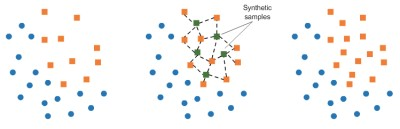

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.5)
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_rus, y_rus)
print('Original dataset shape', y_rus.shape)
print('Resample dataset shape', y_smote.shape)
print(pd.Series(y_smote).value_counts())
df_shots=x_smote
y=y_smote

Original dataset shape (24790,)
Resample dataset shape (30000,)
0    20000
1    10000
dtype: int64


***Normalizing the dataset.***

In [ ]:
# df_shots=df_events_2.to_numpy()
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_shots)
df_shots = scaler.transform(df_shots)

# Splitting the data into train-test sets (70/30)
We will be using k-fold cross validation on the train set for hyperparameter tuning of the ML algorithms.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_shots, y, test_size=0.2, random_state=1) # Splitting data into train and test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)  # Splitting train into train and val. 0.25x0.8=0.2

## Visualising the data with a 3-d plot after appying PCA to reduce dimensions to 3

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # We want to lose maximum of 10% information by PCA, will reduce dimensions accordingly.
X_pca = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
result=pd.DataFrame(X_pca, columns=['PCA%i' % i for i in range(3)])

[0.0800736  0.05439866 0.04445383]


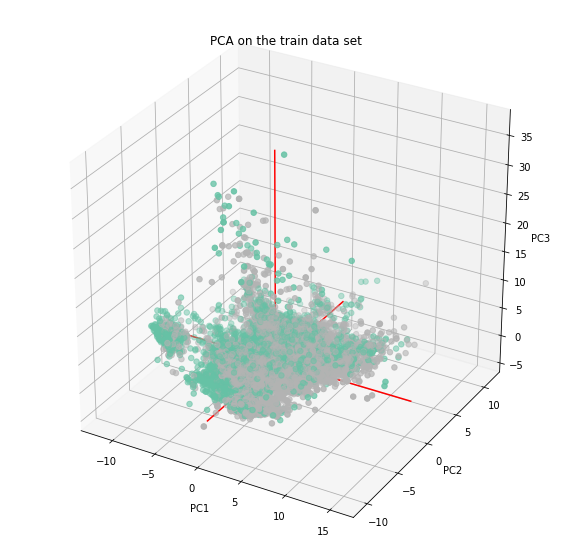

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=y_train, cmap="Set2_r", s=30)
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the train data set")
plt.show()

## Using PCA to reduce dimesionality 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.9) # We want to lose maximum of 10% information by PCA, will reduce dimensions accordingly.
X_train = pca.fit_transform(X_train)
explained_variance = pca.explained_variance_ratio_
print(len(explained_variance))
print("By reducing dimensionality from PCA, ",round((1-sum(explained_variance))*100,2),"% information was lost.")
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)
# print(explained_variance)

65
By reducing dimensionality from PCA,  9.89 % information was lost.


# Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(class_weight='balanced')
clf_lr.fit(X_train,y_train)
y_pred_lr = clf_lr.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_lr))
print(accuracy_score(y_test, y_pred_lr))

[[2982 1041]
 [ 546 1431]]
0.7355


# NeuralNet

In [ ]:
from copy import deepcopy
class MyNeuralNetwork():
    """
    My implementation of a Neural Network Classifier.
    """

    acti_fns = ['relu', 'sigmoid', 'linear', 'tanh', 'softmax']
    weight_inits = ['zero', 'random', 'normal']

    def __init__(self, n_layers, layer_sizes, activation, learning_rate, weight_init, batch_size, num_epochs):
        """
        Initializing a new MyNeuralNetwork object

        Parameters
        ----------
        n_layers : int value specifying the number of layers

        layer_sizes : integer array of size n_layers specifying the number of nodes in each layer

        activation : string specifying the activation function to be used
                     possible inputs: relu, sigmoid, linear, tanh

        learning_rate : float value specifying the learning rate to be used

        weight_init : string specifying the weight initialization function to be used
                      possible inputs: zero, random, normal

        batch_size : int value specifying the batch size to be used

        num_epochs : int value specifying the number of epochs to be used
        """
        self.n_layers = n_layers
        self.layer_sizes = layer_sizes
        self.activation = activation
        self.learning_rate = learning_rate
        self.weight_init = weight_init
        self.batch_size = batch_size
        self.num_epochs = num_epochs 
        self.activation_initialization()
        if activation not in self.acti_fns:
            raise Exception('Incorrect Activation Function')

        if weight_init not in self.weight_inits:
            raise Exception('Incorrect Weight Initialization Function')
        pass
    
    def relu(self, X):    # Done
        """
        Parameters
        X : 1-dimentional numpy array 
        Returns
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        x_calc = np.maximum(0,X)
        return x_calc

    def relu_grad(self, X):    # Done
        """
        Parameters
        X : 1-dimentional numpy array 
        Returns
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        X[X<=0] = 0
        X[X>0] = 1
        x_calc = X
        return x_calc

    def sigmoid(self, X):    # Done
        """
        Parameters
        X : 1-dimentional numpy array 
        Returns        
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        x_calc = 1 / (1 + np.exp(-X))
        return x_calc

    def sigmoid_grad(self, X):    # Done
        """
        Parameters
        X : 1-dimentional numpy array 
        Returns        
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        sigm = 1 / (1 + np.exp(-X))
        x_calc = sigm * (1 - sigm)
        return x_calc

    def linear(self, X):    # Done
        """
        Parameters        
        X : 1-dimentional numpy array 
        Returns        
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        x_calc = 0.1*X        
        return x_calc

    def linear_grad(self, X):    # Done
        """        
        Parameters        
        X : 1-dimentional numpy array 
        Returns        
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        x_calc = np.ones(X.shape)        
        return x_calc

    def tanh(self, X):    # Done
        """        
        X : 1-dimentional numpy array 
        Returns        
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        x_calc = np.tanh(X)
        return x_calc

    def tanh_grad(self, X):    # Done
        """
        Parameters        
        X : 1-dimentional numpy array 
        Returns        
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        x_calc = 1 - (np.tanh(X)**2)
        return x_calc

    def softmax(self, X):    # Done
        """
        Parameters
        X : 1-dimentional numpy array 
        Returns
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        exps = np.exp(X - np.amax(X,axis=0))
        x_calc = exps / np.sum(exps, axis=0)        
        return x_calc

    def softmax_grad(self, X):
        """      
        Parameters
        X : 1-dimentional numpy array 
        Returns
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        x_calc = self.softmax(X) * (1 - self.softmax(X))
        return x_calc

    def activation_initialization(self):
        if self.activation == "relu":
          self.activation_func = self.relu
          self.activation_func_grad = self.relu_grad
        elif self.activation == "sigmoid":
          self.activation_func = self.sigmoid
          self.activation_func_grad = self.sigmoid_grad
        elif self.activation == "tanh":
          self.activation_func = self.tanh
          self.activation_func_grad = self.tanh_grad
        elif self.activation == "linear":
          self.activation_func = self.linear
          self.activation_func_grad = self.linear_grad
        
    def zero_init(self, shape):    # Done
        """        
        Parameters        
        shape : tuple specifying the shape of the layer for which weights have to be generated 
        Returns       
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        weight = np.zeros(shape)
        return weight

    def random_init(self, shape):    # Done
        """
        Parameters        
        shape : tuple specifying the shape of the layer for which weights have to be generated 
        Returns        
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        weight = np.random.rand(*shape)*0.01
        return weight

    def normal_init(self, shape):    # Done
        """        
        Parameters       
        shape : tuple specifying the shape of the layer for which weights have to be generated 
        Returns       
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        weight = np.random.randn(*shape)*0.01
        return weight

    def weight_initialization(self):
        self.weights=[]
        self.biases=[]
        if self.weight_init=='zero':
          for i in range(self.n_layers-1):
            self.weights.append(self.zero_init((self.layer_sizes[i],self.layer_sizes[i+1])))     # 784 x 256, 256 x 128, 128 x 64, 64 x10
            self.biases.append(np.zeros((self.layer_sizes[i+1],1)))      # 256 x 1 ....
        if self.weight_init=='random':
          for i in range(self.n_layers-1):
            self.weights.append(self.random_init((self.layer_sizes[i],self.layer_sizes[i+1])))     # 784 x 256, 256 x 128, 128 x 64, 64 x10
            self.biases.append(np.zeros((self.layer_sizes[i+1],1)))      # 256 x 1 ....
        if self.weight_init=='normal':
          for i in range(self.n_layers-1):
            self.weights.append(self.normal_init((self.layer_sizes[i],self.layer_sizes[i+1])))     # 784 x 256, 256 x 128, 128 x 64, 64 x10
            self.biases.append(np.zeros((self.layer_sizes[i+1],1)))      # 256 x 1 ....

    def load_weights_biases(self,weights,biases):
      self.weights = weights
      self.biases = biases
  
    def forward_prop(self, X):
        """
        Parameters      
        X : 1-dimentional numpy array (784x1)
        Returns        
        z_list, a_list
        """
        z_list=[]
        a_list=[]
        self.tsne_list=[]
        a_list.append(X)                                       
        for i in range(0, self.n_layers-1):   #0,1,2,3
          # print(i, self.weights[i].shape, a_list[i].shape, self.biases[i].shape)
          z = np.dot(self.weights[i].T,a_list[i]) + self.biases[i]    #256x784 X 784x100 = 256x100 , 128x256 X 256x100
          z_list.append(z)
          # print(i,z)          
          if (i==self.n_layers-2):            
            a_list.append(self.softmax(z))            
          elif (i==self.n_layers-3):
            a_list.append(self.activation_func(z))          
            self.tsne_list.append(self.activation_func(z))
          else:
            a_list.append(self.activation_func(z))          
        return z_list, a_list

    def entropy_loss(self, y, y_prob):            
      y_prob = y_prob.T
      for i in range(len(self.classes)):
        y[y == self.classes[i]] = i
      loss = 0
      for i in range(y_prob.shape[0]):
        loss -= np.sum(np.log(y_prob[i, y == i]))
      return loss/y_prob.shape[1]            

    def backward_prop(self,z_list,a_list,y):   
      # print("----------BACKPROP-----------")   
      # error = 2 * self.entropy_loss(y,a_list[-1])
      error = a_list[-1]      
      for i in range(error.shape[0]):
        error[i,y==i] -= 1     
      weight_changes= [0]*(self.n_layers-1)
      bias_changes=[0]*(self.n_layers-1)
      for i in range(self.n_layers-2, -1, -1):                   
        weight_changes[i] = np.dot(error, a_list[i].T).T 
        bias_changes[i] = error.mean(axis=1).reshape((-1,1))       
        if i!=0:                    
          error = np.multiply(np.dot(self.weights[i], error), self.activation_func_grad(z_list[i-1]))              
      for i in range(len(self.weights)):
        self.weights[i] -= (self.learning_rate * weight_changes[i])
        self.biases[i] -= (self.learning_rate * bias_changes[i])
    
    def one_hot(self, y):
      onehot_y = np.zeros((y.size,y.max()+1))
      onehot_y[np.arange(y.size),y] = 1      
      return onehot_y
  
    def fit(self, X, y):
        """
        Parameters        
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as training data.
        y : 1-dimensional numpy array of shape (n_samples,) which acts as training labels.      
        Returns        
        self : an instance of self
        """                
        self.classes, y = np.unique(y, return_inverse=True)                       
        # self.activation_initialization()
        self.weight_initialization()
        self.save_weights_per_epoch=[]
        self.save_biases_per_epoch=[]
        self.training_loss_per_epoch=[]
        for i in range(self.num_epochs):
          for j in range(0,len(y),self.batch_size):          
            X_batch = X[j:j+self.batch_size,:].T            
            z_list, a_list = self.forward_prop(X_batch)
            self.backward_prop(z_list, a_list, y[j:j+self.batch_size])
          loss = self.entropy_loss(y,self.predict_proba(X))
          print("Epoch:",i+1,"| Loss:",loss)          
          self.training_loss_per_epoch.append(loss)
          self.save_weights_per_epoch.append(deepcopy(self.weights))
          self.save_biases_per_epoch.append(deepcopy(self.biases))
        # fit function has to return an instance of itself or else it won't work with test.py
        return self

    def predict_proba(self, X):
        """
        Parameters        
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.
        Returns      
        y : 2-dimensional numpy array of shape (n_samples, n_classes) which contains the 
            class wise prediction probabilities.
        """      
        z_list,a_list = self.forward_prop(X.T)
        y = a_list[-1].T
        # return the numpy array y which contains the predicted values
        return y

    def predict(self, X):
        """      
        Parameters        
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.
        Returns        
        y : 1-dimensional numpy array of shape (n_samples,) which contains the predicted values.
        """
        y_prob = self.predict_proba(X)
        y_ind = y_prob.argmax(axis=1)
        y = self.classes[y_ind]
        # return the numpy array y which contains the predicted values
        return y
    
    def score(self, X, y):
        """
        Predicting values using the trained linear model.
        Parameters        
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.
        y : 1-dimensional numpy array of shape (n_samples,) which acts as testing labels.
        Returns        
        acc : float value specifying the accuracy of the model on the provided testing set
        """  
        self.classes, y = np.unique(y, return_inverse=True)
        y_pred = self.predict(X)            
        acc = np.mean(y==y_pred)  
        return acc

  

In [ ]:
nn = MyNeuralNetwork(6,[65,256,128,64,32,2],'relu',0.01,'normal',64,70)
nn.fit(X_train,y_train)

Epoch: 1 | Loss: 0.6398527518252947
Epoch: 2 | Loss: 0.6363413984321424
Epoch: 3 | Loss: 0.4979405827846755
Epoch: 4 | Loss: 0.4860273186223039
Epoch: 5 | Loss: 0.48124525786545663
Epoch: 6 | Loss: 0.47618538601997373
Epoch: 7 | Loss: 0.4680988269807327
Epoch: 8 | Loss: 0.46155375501880774
Epoch: 9 | Loss: 0.4563968222358613
Epoch: 10 | Loss: 0.448927248817572
Epoch: 11 | Loss: 0.4416074881324657
Epoch: 12 | Loss: 0.4354521142427697
Epoch: 13 | Loss: 0.42880906927539514
Epoch: 14 | Loss: 0.42166798015003465
Epoch: 15 | Loss: 0.41529295359408996
Epoch: 16 | Loss: 0.4184297127997269
Epoch: 17 | Loss: 0.40616297013815517
Epoch: 18 | Loss: 0.4017174691249165
Epoch: 19 | Loss: 0.3919694901780105
Epoch: 20 | Loss: 0.3920163911925589
Epoch: 21 | Loss: 0.3885046733951831
Epoch: 22 | Loss: 0.3894499830614741
Epoch: 23 | Loss: 0.38275745255091975
Epoch: 24 | Loss: 0.3693721020217643
Epoch: 25 | Loss: 0.3639934792799446
Epoch: 26 | Loss: 0.37265279978911253
Epoch: 27 | Loss: 0.3657497275728415
Ep

In [ ]:
y_pred_nn = nn.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_nn))
print(confusion_matrix(y_test,y_pred_nn))

0.799
[[3464  559]
 [ 647 1330]]


In [ ]:
model_weights_per_epoch = nn.save_weights_per_epoch
model_biases_per_epoch = nn.save_biases_per_epoch
model_traning_loss_per_epoch = nn.training_loss_per_epoch

In [ ]:
model_validation_loss_per_epoch = []
temp1=[]
temp2=[]
for i in range(len(model_weights_per_epoch)):  
  nn.load_weights_biases(model_weights_per_epoch[i],model_biases_per_epoch[i])
  loss = nn.entropy_loss(y_test, nn.predict_proba(X_test))
  temp1.append(nn.score(X_train,y_train))
  temp2.append(nn.score(X_test,y_test))
  # score = nn.score(X_test,y_test)  
  model_validation_loss_per_epoch.append(loss)

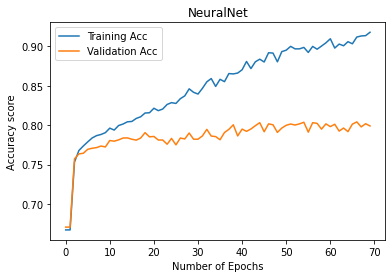

In [ ]:
import matplotlib.pyplot as plt
plt.plot(temp1,label="Training Acc")
plt.plot(temp2,label="Validation Acc")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy score")
plt.title("NeuralNet")
plt.legend()
plt.show()

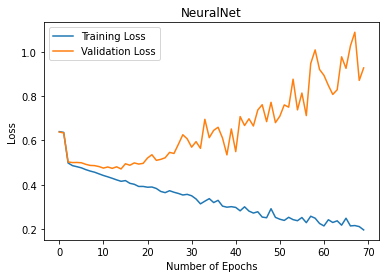

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_traning_loss_per_epoch,label="Training Loss")
plt.plot(model_validation_loss_per_epoch,label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("NeuralNet")
plt.legend()
plt.show()

# Applying Support Vector Classifier (SVC)

In [ ]:
# from sklearn.svm import SVC
# clf_svc = SVC(probability=True)
# clf_svc.fit(X_train,y_train)  # This will take 10-20 seconds
# y_pred_svc=clf_svc.predict(X_test)

In [ ]:
# print(confusion_matrix(y_test, y_pred_svc))
# print(accuracy_score(y_test, y_pred_svc))

# USING ADABOOST Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf_abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
clf_abc.fit(X_train, y_train)
y_pred_abc = clf_abc.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_abc))
print(confusion_matrix(y_test,y_pred_abc))

# Applying XGBoost Classifier with Hyperparameter optimization using Hyperopt
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.
Hyperopt uses a form of Bayesian optimization for parameter tuning that allows you to get the best parameters for a given model. We have taken the loss as brier score

In [ ]:
# !nvidia-smi

In [ ]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import xgboost as xgb

In [ ]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),   #hp.quniform(label, low, high, q) — Returns a value round(uniform(low, high) / q) * q, i.e it rounds the decimal values and returns an integer.
        'gamma': hp.uniform ('gamma', 1,9),               #hp.uniform(label, low, high) — Returns a value uniformly between low and high.
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [ ]:
def objective(space):
    clff=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_val, y_val)]
    
    clff.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    probs = clff.predict_proba(X_test)
    probs = probs[:, 1]
    loss = brier_score_loss(y_test, probs)
    # accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", loss)
    return {'loss': loss, 'status': STATUS_OK }

In [ ]:
trials = Trials()
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 10,
                        trials = trials)

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

In [ ]:
clf_xgb=xgb.XGBClassifier(colsample_bytree=best_hyperparams['colsample_bytree'],gamma=best_hyperparams['gamma'],max_depth=int(best_hyperparams['max_depth']),min_child_weight=int(best_hyperparams['min_child_weight']),reg_alpha=int(best_hyperparams['reg_alpha']),reg_lambda=best_hyperparams['reg_lambda'])
clf_xgb.fit(X_train,y_train)
y_pred_xgb = clf_xgb.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))

# Evaluation

In [ ]:
# For Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import brier_score_loss
import numpy.ma as ma
from matplotlib.ticker import MultipleLocator
from sklearn.metrics import auc, roc_curve
from scipy import integrate
from sklearn.neighbors import KernelDensity
# Maybe More

In [ ]:
def plot_calibration_curve(bcc,y_true,y_pred,name='Calibration curve',min_samples=None,axis=None):
    if axis is None:
        axis = plt.figure(figsize=(5, 5)).add_subplot(111)
    axis.set_title(name)
    axis.plot([0, 100], [0, 100], ls='--', lw=1, color='grey')
    axis.set_xlabel('Predicted probability')
    axis.set_ylabel('True probability in each bin')
    axis.set_xlim((0, 100))
    axis.xaxis.set_major_locator(MultipleLocator(20))
    axis.xaxis.set_minor_locator(MultipleLocator(10))
    axis.set_ylim((0, 100))
    axis.yaxis.set_major_locator(MultipleLocator(20))
    axis.yaxis.set_minor_locator(MultipleLocator(10))
    # axis.set_aspect(1)
    axis.grid(which='both')
    sample_probabilities = bcc[0]
    predicted_pos_percents = bcc[1]
    num_plays_used = bcc[2]

    if min_samples is not None:
        axis.plot(sample_probabilities,predicted_pos_percents,c='c',alpha=0.3)
        sample_probabilities = ma.array(sample_probabilities)
        sample_probabilities[num_plays_used < min_samples] = ma.masked
        predicted_pos_percents = ma.array(predicted_pos_percents)
        predicted_pos_percents[num_plays_used < min_samples] = ma.masked

    max_deviation = bcc[3]
    residual_area = bcc[4]

    axis.plot(sample_probabilities,predicted_pos_percents,c='c',label='Calibration curve\n(area = %0.2f, max dev = %0.2f)'% (residual_area, max_deviation))
    axis.legend(loc='lower right')

    ax2 = axis.twinx()
    ax2.hist(y_pred * 100,bins=np.arange(0, 101, 1),density=True,alpha=0.4,facecolor='grey')
    ax2.set_ylim([0, 0.2])
    ax2.set_yticks([0, 0.1, 0.2])
    plt.tight_layout()
    return axis

In [ ]:
def plot_roc_curve(y_true, y_prob, name='Calibration curve', axis=None):

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    if axis is None:
        axis = plt.figure(figsize=(5, 5)).add_subplot(111)

    axis.plot(fpr, tpr, linewidth=1, label='ROC curve (area = %0.2f)' % roc_auc)

    # reference line, legends, and axis labels
    axis.plot([0, 1], [0, 1], linestyle='--', color='gray')
    axis.set_title('ROC curve')
    axis.set_xlabel('False Positive Rate')
    axis.set_ylabel('True Positive Rate')
    axis.set_xlim(0, 1)
    axis.xaxis.set_major_locator(MultipleLocator(0.20))
    axis.xaxis.set_minor_locator(MultipleLocator(0.10))
    axis.set_ylim(0, 1)
    axis.yaxis.set_major_locator(MultipleLocator(0.20))
    axis.yaxis.set_minor_locator(MultipleLocator(0.10))
    axis.grid(which='both')
    plt.gca().legend()
    axis.legend(loc='lower right')
    plt.tight_layout()

In [ ]:
# y_test, y_pred (prob), y_score(Predicted Label)
# y_pred = clf.predict_proba(X_test)
# y_score = clf.predict(X_test)
# model = Trained Model like clf =  LogisticRegression.fit()
# X_test
def run(model,X_test,y_test):
    y_test = np.array(y_test,dtype=bool)
    y_pred = model.predict_proba(X_test)
    y_score = model.predict(X_test)
    
    y_pred = y_pred[:,1] 
    
    #Accuracy
    acc = accuracy_score(y_test, y_score)
    
    print("Confusion Matrix")
    # Confusion Matrix
    # plot_confusion_matrix(model, X_test, y_test)  
    # plt.show() 
    
    #PR Graph
    prec, recall, _ = precision_recall_curve(y_test, y_score)
    # pr_display = PrecisionRecallDisplay(precision=prec, recall=recall,average_precision=None, estimator_name=None,clas)    
    # Calibration Curve
    n_bins = 100
    bandwidth = 1 / n_bins

    #Kernel Density Estimation
    kde_pos = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit((y_pred[y_test])[:, np.newaxis])
    kde_total = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(y_pred[:, np.newaxis])
    sample_probabilities = np.linspace(0.01, 0.99, 99)
    # Finding Probability and scaling
    number_density_offense_won = np.exp(kde_pos.score_samples(sample_probabilities[:, np.newaxis])) * np.sum((y_test))
    number_density_total = np.exp(kde_total.score_samples(sample_probabilities[:, np.newaxis])) * len(y_test)
    # Count of Each Bucket
    number_pos = (number_density_offense_won* np.sum(y_test)/ np.sum(number_density_offense_won))
    number_total = (number_density_total * len(y_test) / np.sum(number_density_total))
    # Fraction of goals scored from attempts in each bucket
    predicted_pos_percents = np.nan_to_num(number_pos / number_total, 1)
    #Scaling to 100
    sample_probabilities = 100.0 * sample_probabilities
    predicted_goal_percents = 100.0 * predicted_pos_percents
    num_shots_used = number_total
    # Calculating Deviation and Residual Area
    max_deviation = np.max(np.abs(predicted_goal_percents - sample_probabilities))
    residual_area = integrate.trapz(np.abs(predicted_goal_percents - sample_probabilities),sample_probabilities)
    
    # ROC and Brier
    roc = roc_auc_score(y_test, y_pred)
    brier = brier_score_loss(y_test, y_pred)

    # Gather Everything
    gather = [sample_probabilities,predicted_goal_percents,num_shots_used,max_deviation,residual_area,roc,brier]

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    plot_roc_curve(y_test,y_pred, axis=ax[0])
    plot_calibration_curve(gather,y_test,y_pred,min_samples=100,axis=ax[1],)
    ax[2].grid(which='both')
    ax[2].set_title("Precision-Recall Graph")
    # pr_display.plot(ax=ax[2])
    ax[2].plot(recall,prec)
    print("Accuracy",acc)
    print("AUROC",roc)
    print("Brier Score",brier)
    print("Area of Residual Graph",residual_area)
    print("Maximum Deviation", max_deviation)

# Results

Logistic Regression

In [ ]:
run(nn,X_test,y_test)

In [ ]:
run(clf_lr,X_test,y_test) # Logistic regression 

Support Vector Classifier 

In [ ]:
# run(clf_svc,X_test,y_test) # Support Vector Classifier

ADA Boost Classifier

In [ ]:
run(clf_abc,X_test,y_test) # ADA Boost Classifier

XGBoost Classifier

In [ ]:
run(clf_xgb,X_test,y_test)

In [ ]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, clf_lr,scoring="roc_auc") #{'accuracy', 'average_precision', 'f1_micro', 'f1_macro', 'f1_weighted', 'f1_samples', 'log_loss', 'precision', 'recall', 'roc_auc', 'adjusted_rand_score', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'r2'}
plt.show()

In [ ]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, clf_xgb,scoring="roc_auc") #{'accuracy', 'average_precision', 'f1_micro', 'f1_macro', 'f1_weighted', 'f1_samples', 'log_loss', 'precision', 'recall', 'roc_auc', 'adjusted_rand_score', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'r2'}
plt.show()

In [ ]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_val, y_val, clf_xgb,scoring="roc_auc") #{'accuracy', 'average_precision', 'f1_micro', 'f1_macro', 'f1_weighted', 'f1_samples', 'log_loss', 'precision', 'recall', 'roc_auc', 'adjusted_rand_score', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'r2'}
plt.show()